<a href="https://colab.research.google.com/github/twinkleSojeong/StockAnalysisInPython/blob/master/%ED%91%9C%EC%A4%80%ED%99%94%EC%A3%BC%EA%B0%80_%EA%B5%AC%ED%95%98%EA%B3%A0_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EB%8A%94_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치해야하는건 냅다 깔아버려

라이브러리 먼저 깔고요

In [ ]:
pip install -U finance-datareader

In [2]:
#라이브러리 설치 모음집
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import platform
import numpy as np
import scipy.stats as ss
import plotly
import plotly.graph_objects as go
import plotly.express as px

차트 모양새도 정해줍시다

In [3]:
#matplotlib 환경설정
plt.rcParams["font.family"] = 'NanumSquareB.ttf'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 폰트 환경설정(colab 기준)
# 다른 환경에서 이용할 경우 Linux를 system_name로 변경

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    Linux = platform.system()

    if Linux == "Darwin" :
        font_family = "AppleGothic"

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# REAL 분석시작

가스회사주가 단박에 볼래요

In [5]:
#가스회사 리스트로 만들기
gas_company_list = [
    ["한국가스공사", "036460"],
    ["서울도시가스", "017390"],
    ["예스코", "015360"],
    ["삼천리", "004690"],
    ["인천도시가스", "034590"],
    ["경동도시가스", "267290"],
    ["대성에너지", "117580"],
    ["지에스이", "053050"],
]

In [ ]:
#가스회사 주가 불러와서 표로 그리기
df_list = [fdr.DataReader(code, '2008-01-01', '2021-08-21')['Close']for name, code in gas_company_list]
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in gas_company_list]
df

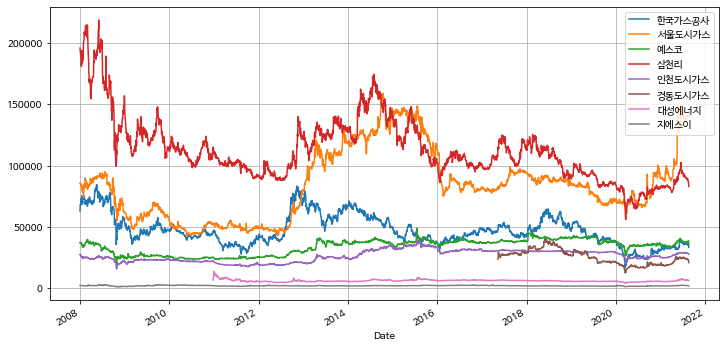

In [7]:
#(만족감을 위한) 주가그래프
df.plot()

크고 작은 애들 정리해주자구요(표준화)

In [8]:
# zscore를 이용한 표준화
# ss.zscore()에서 nan_policy='omit'은 NaN값을 무시하는 옵션
# 자세한 내용은 링크참고 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

data_ss = ss.mstats.zscore(df, axis=0, ddof=0, nan_policy='omit')
data_ss = pd.DataFrame(data_ss)

In [ ]:
#표준화한 값 표에 넣기

df_ss = pd.DataFrame(data_ss)
df_ss

자꾸 사라지는 날짜는 누더기로 붙여줘요

In [ ]:
#colums 중복생성
data_ss.columns = ['한국','서울','예스','삼','인천','경동','대성','지에']
data_ss

In [11]:
#리셋인덱스로 df2 제작
df_2 = df.reset_index()

In [ ]:
#누더기 날짜 붙여서(concat) df3 제작
#df_3가 표준화된 주가 표를 나타냄

df_3 = pd.concat([df_2, data_ss], axis=1)
df_3 = df_3.set_index('Date')
df_3 = df_3[['한국', '서울', '예스', '삼', '인천', '경동', '대성', '지에']]
df_3.columns = [name for name, code in gas_company_list]
df_3

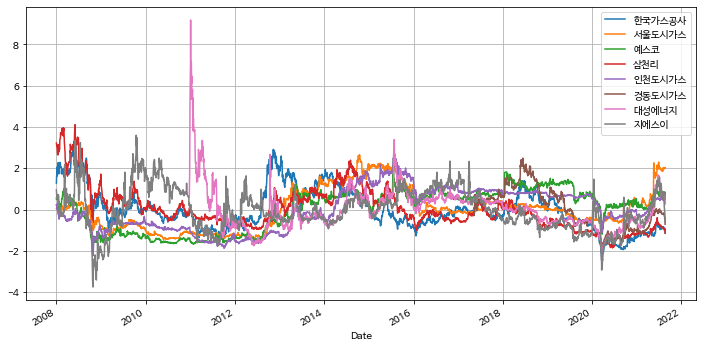

In [13]:
#(만족감을 위한) 표준화된 주가 그래프
df_3.plot()